In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# at top of your scripts, once:

plt.style.use('astro')  # if in ~/.config/matplotlib/stylelib/astro.mplstyle


In [2]:
# Paths to your files
le_pf_csv = '/home/supremekai/thesis/J0243_6p6124/HXMT/pf_results/LE_pulsed_fractions.csv'
me_pf_csv = '/home/supremekai/thesis/J0243_6p6124/HXMT/pf_results/ME_pulsed_fractions.csv'
he_pf_csv = '/home/supremekai/thesis/J0243_6p6124/HXMT/pf_results/HE_pulsed_fractions.csv'
spectra_csv = '/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_reporting_spectra.csv'

# Load data
le_df = pd.read_csv(le_pf_csv)
me_df = pd.read_csv(me_pf_csv)
he_df = pd.read_csv(he_pf_csv)
spectra_df = pd.read_csv(spectra_csv,sep="\t",comment="#")

# Merge only the ID and Luminosity columns
spectra_subset = spectra_df[['ID', 'Lumin']].copy()

le_df['ExposureID'] = le_df['ExposureID'].astype(str).str.strip()
me_df['ExposureID'] = me_df['ExposureID'].astype(str).str.strip()
he_df['ExposureID'] = he_df['ExposureID'].astype(str).str.strip()
spectra_subset['ID'] = spectra_subset['ID'].astype(str).str.strip()


In [3]:
# Merge PF data (ExposureID) with spectra data (ID)
le_merged = le_df.merge(spectra_subset, left_on='ExposureID', right_on='ID', how='left')
me_merged = me_df.merge(spectra_subset, left_on='ExposureID', right_on='ID', how='left')
he_merged = he_df.merge(spectra_subset, left_on='ExposureID', right_on='ID', how='left')

In [4]:
df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER_second_run/pf_results/NICER_pulsed_fractions.csv',sep=',')
df_nicer_spectra=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER/reporting_spectra_iteration_2.csv',sep='\t')
# df=pd.read_csv('rms_pulsed_rms_lc_file_barycorr_orbit.txt',sep='\t')
# Merge PF data (ExposureID) with spectra data (ID)
nicer_merged = df.merge(df_nicer_spectra[['Obs ID','Lumin']], left_on='ObsID', right_on='Obs ID', how='left')

In [5]:
le_sorted = le_merged.sort_values(by='Lumin')
he_sorted = he_merged.sort_values(by='Lumin')
me_sorted = me_merged.sort_values(by='Lumin')

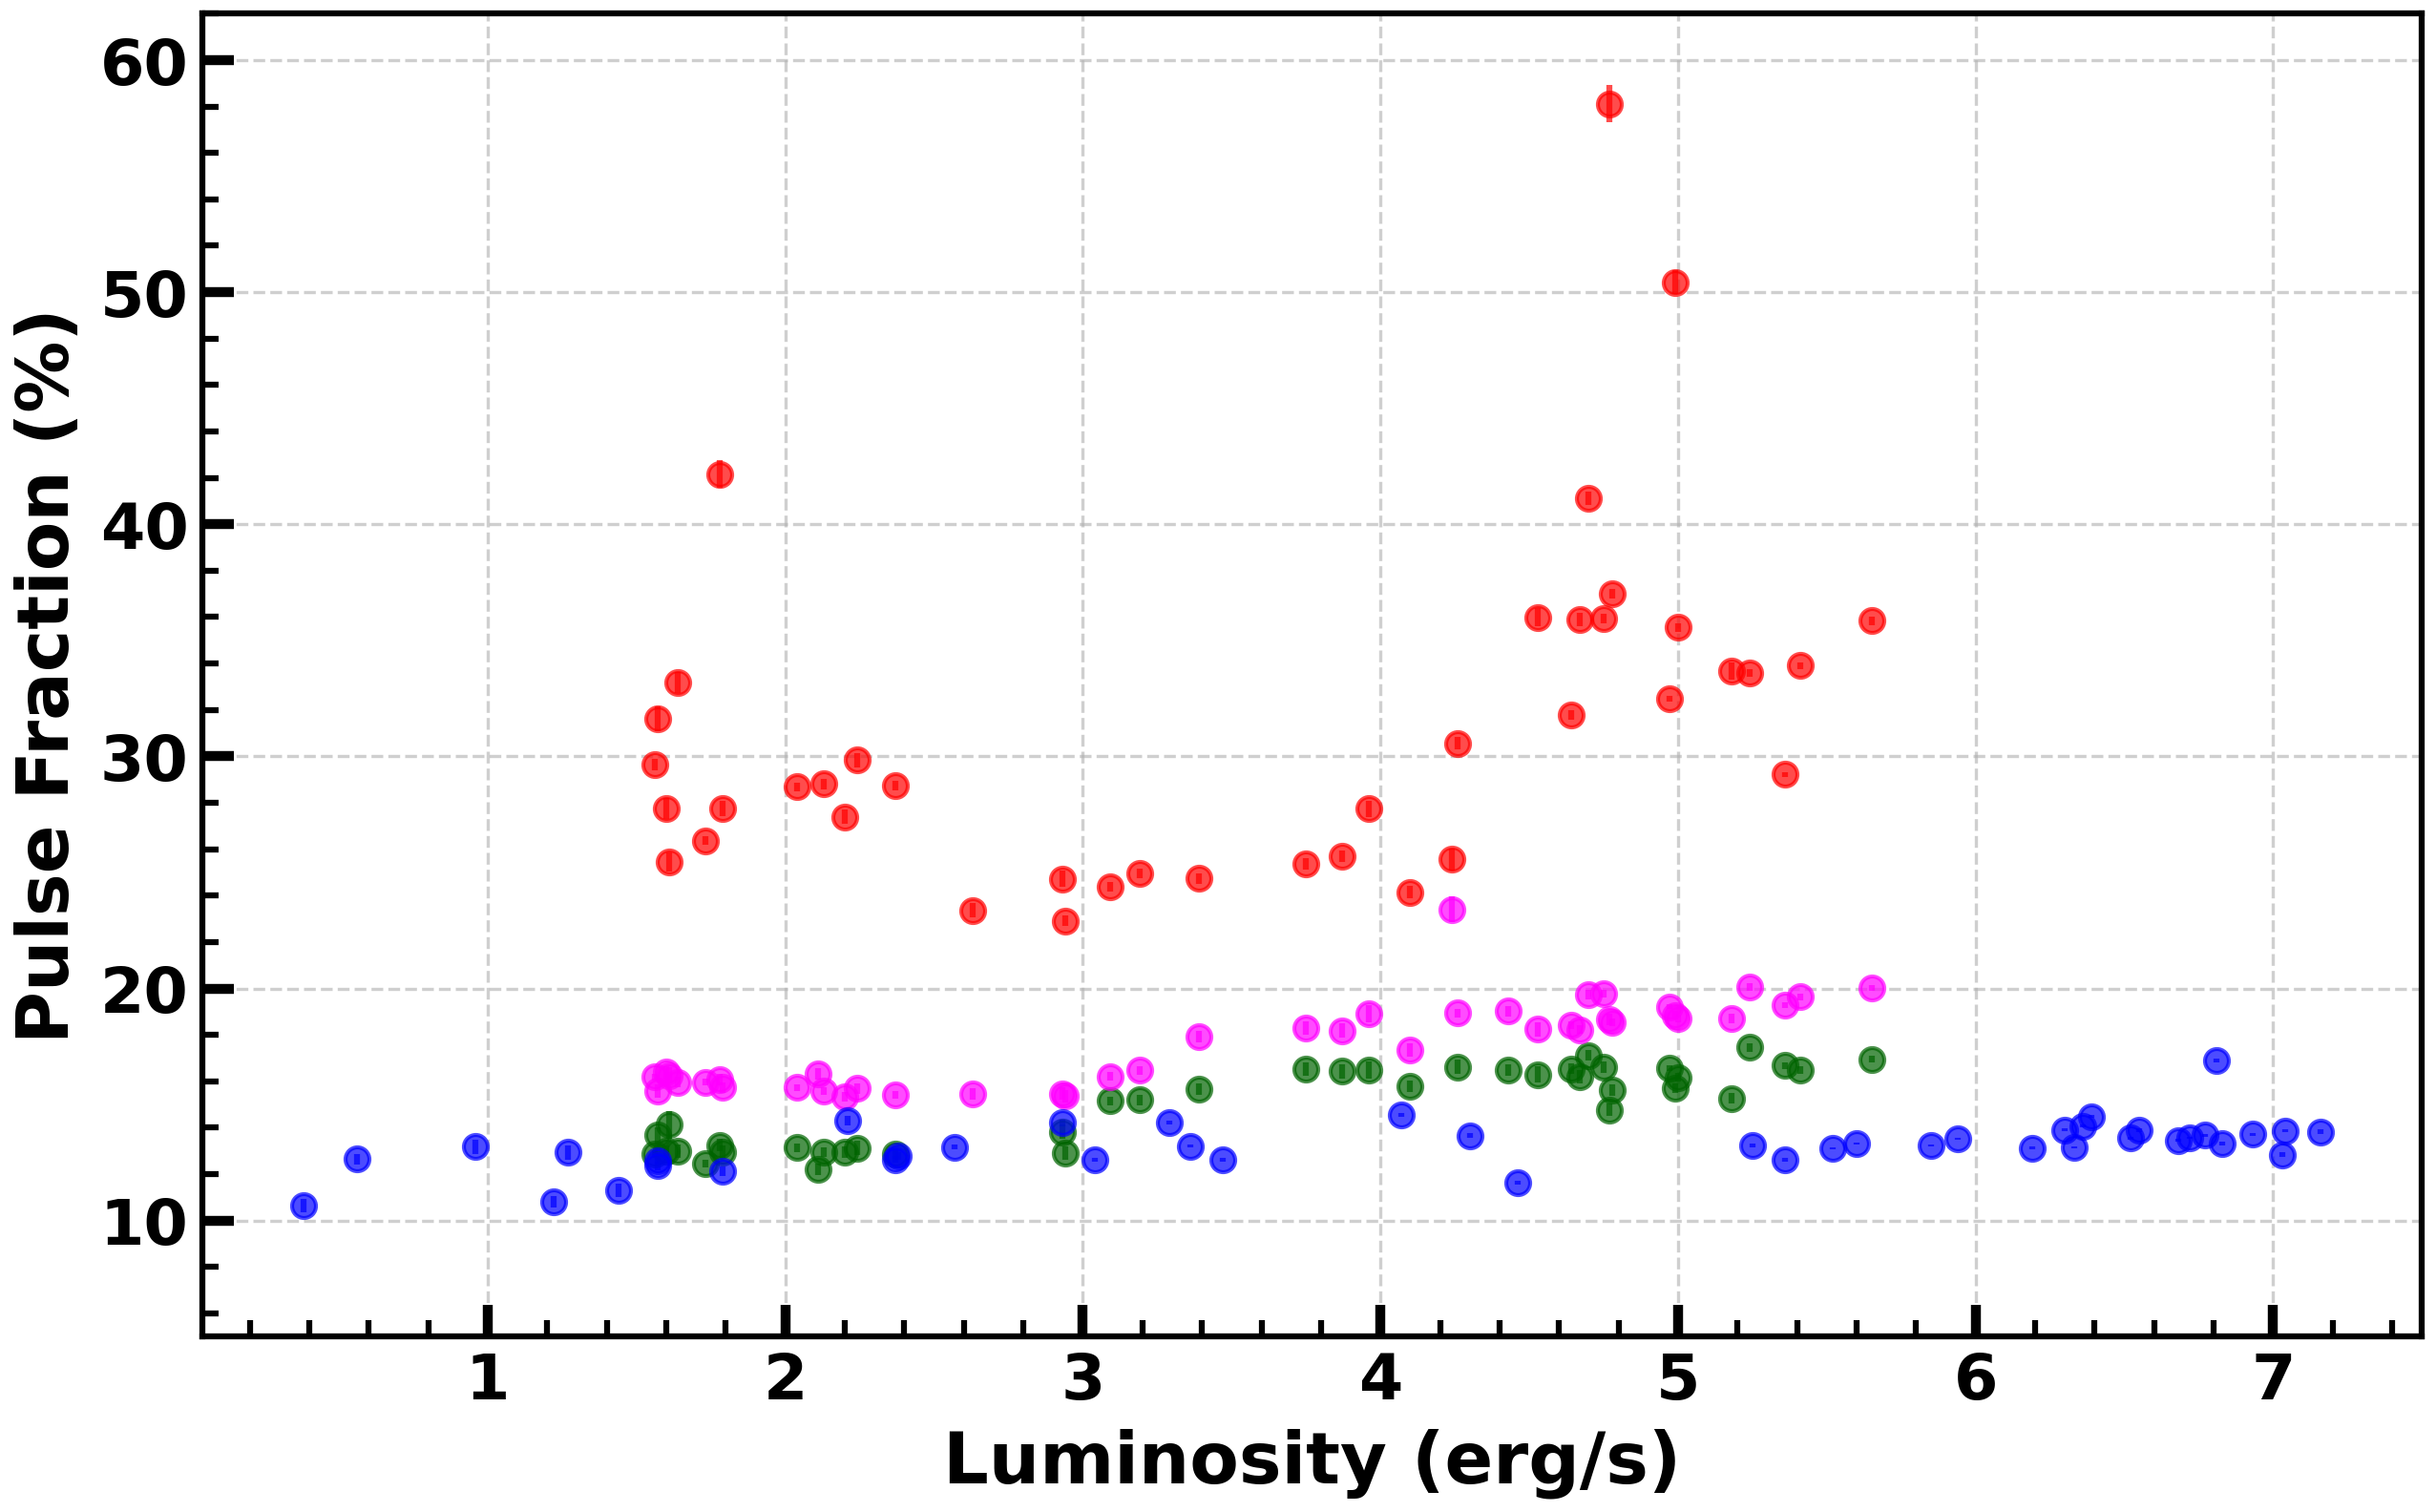

In [6]:
# Plot RMS Pulsed Fraction vs Lumin
plt.figure(figsize=(10, 6))
plt.errorbar(le_sorted['Lumin']/1e37, le_sorted['RMS_PulsedFraction']*100,yerr=le_sorted['RMS_PulsedFraction_Error']*100,fmt='o',label='LE', color='darkgreen', alpha=0.7)
plt.errorbar(me_sorted['Lumin']/1e37, me_sorted['RMS_PulsedFraction']*100,yerr=me_sorted['RMS_PulsedFraction_Error']*100,fmt='o',label='ME', color='magenta', alpha=0.7)
plt.errorbar(he_sorted['Lumin']/1e37, he_sorted['RMS_PulsedFraction']*100,yerr=he_sorted['RMS_PulsedFraction_Error']*100,fmt='o', label='HE', color='red', alpha=0.7)
plt.errorbar(nicer_merged['Lumin']/1e37, nicer_merged['RMS_PulsedFraction']*100,yerr=nicer_merged['RMS_PulsedFraction_Error']*100, fmt='o', label='NICER', color='blue', alpha=0.7)


#plt.xscale('log')
plt.minorticks_on()
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Pulse Fraction (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.ylim(5,62)
plt.savefig('/home/supremekai/thesis/J0243_6p6124/plot_rmspf_variation_for_all.png')